Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Excercise 2 <br>
Date: 9/24/2021 <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>

In [11]:
import pandas as pd

df = pd.read_csv('ds_ex2.txt', names=["ID", "HEIGHT", "BMI", "WEIGHT", "LDL", "SBP"])  # Importing File
df.set_index("ID", inplace=True)  # Resetting the index to the ID number
df.head()

,HEIGHT,BMI,WEIGHT,LDL,SBP
ID,,,,,
10000,1.67,19.0,52.99,115,126
10001,1.85,18.0,61.61,112,97
10002,1.80,31.0,100.44,-1,146
10003,1.49,24.0,53.28,130,116
10004,1.75,21.0,64.31,121,139


A) For the data with all records with -1 removed: <br>
-The mean of columns 2,3,4, and 5 <br>
-The correlation coefficient for each column pair <br>

In [12]:
df_a = df.copy()  # Copying the df so it can be manipulated
df_a = df_a[df_a.LDL != -1]  # removing all records with -1, note LDL is the column with -1
df_a.mean(axis=0)  # Getting the mean of columns 2,3,4,5

HEIGHT      1.682763
BMI        23.955990
WEIGHT     68.087482
LDL       129.867971
SBP       129.083130
dtype: float64

In [13]:
# The Correlation coefficient for each column pair
df_a.corr()

,HEIGHT,BMI,WEIGHT,LDL,SBP
HEIGHT,1.000000,-0.034972,0.514509,-0.034972,-0.014620
BMI,-0.034972,1.000000,0.830531,1.000000,0.801063
WEIGHT,0.514509,0.830531,1.000000,0.830531,0.672957
LDL,-0.034972,1.000000,0.830531,1.000000,0.801063
SBP,-0.014620,0.801063,0.672957,0.801063,1.000000


B) For the data with all -1 values replaced by the ldl mean: <br>
-The mean of columns 2..5 <br>
-The correlation coefficient for each column pair <br>

In [14]:
df_b = df.copy()
df_b["LDL"] = df_b["LDL"].replace([-1], df_a["LDL"].mean())  # Replacing the -1 values with the column mean
df_b.mean(axis=0)

HEIGHT      1.685260
BMI        25.214000
WEIGHT     71.924640
LDL       129.867971
SBP       133.070000
dtype: float64

In [15]:
df_b.corr()

,HEIGHT,BMI,WEIGHT,LDL,SBP
HEIGHT,1.000000,-0.010546,0.521627,-0.031778,0.020074
BMI,-0.010546,1.000000,0.839000,0.846905,0.825227
WEIGHT,0.521627,0.839000,1.000000,0.695751,0.709841
LDL,-0.031778,0.846905,0.695751,1.000000,0.692191
SBP,0.020074,0.825227,0.709841,0.692191,1.000000


C) Answer these questions and put your answers in the text box (but first list the names of your group members):
-For the reduced data set with the missing data records removed, which columns are correlated?
  Is this correlation strong?  Does this correlation "make sense"

For the data set with the missing data records removed we define linear correlation as values that are above 0.8.
Meaning that we found that we found the following columns to be strongly linearly correlated.

These correlations all make sense with the exception of the LDL and BMI correlation.
A correlation coefficient of 1 means that in every case where there is an increase of LDL there will be a direct
increase in BMI.  While the two values may impact one another, there is no direct linear correlation between LDL and BMI.

[BMI and Weight] (0.83)This linear correlation makes sense since BMI is dependent on weight.
[BMI and SBP] (0.80) loss significantly reduces blood pressure. Which means that this linear correlation makes sense.
[WEIGHT and LDL] (0.83) Weight loss helps lower LDL cholesterol, making this linear correlation make sense
[LDL and BMI] (1.0) Both are contributing risk factors for cardiovascular disease in obese individuals
[LDL and SBP] (.80) LDL is a measure of the "bad cholesterol" in your arteries which would make sense that with
the build up there would be an increase in blood pressure.

-Did replacing the "-1" values with the ldl mean approach change the mean and correlation values
compared to omitting the records?  How did they change?

Yes, replacing the -1 values with the ldl mean approach did change the mean and linear correlation values
compared to omitting the records.

The Height mean had a negligible change going from 1.682763 to 1.685260
The BMI mean increased from  23.955990 to 25.214000
The Weight mean increased from 68.087482 to 71.924640
The SBP mean had the greatest increase going from 129.083130 to 133.070000

For the linear correlations:
There were noticeable differences in linear correlation between
[SBP, LDL] Changing from a strong linear correlation of .801603 to a much weaker linear correlation of .692191
[LDL, BMI] Changing from a linear correlation of 1 to .846905

-Which method do you think is "better" and why?
I believe that using the mean value for the LDL in place of the values with errors is the "better" method for
handling the missing data.  When using the mean value we have more appropriate linear correlation values, for example,
the decrease in value from 1.0 to 0.84 with the LDL and BMI linear correlation.

Group Members: Emma Bright and Mike Santoro <br>

Text(0.5, 1.0, 'Correlation heatmap for -1 Removal')

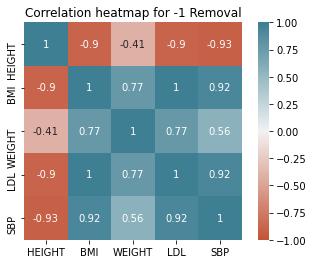

In [24]:
import seaborn as sns
import numpy as np


df_a_corr = df_a.corr()
ax = sns.heatmap(df_a_corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(20,220, n=200),
                 square=True,
                 annot=True)
ax.set_title("Correlation heatmap for -1 Removal")

Text(0.5, 1.0, 'Correlation heatmap for -1 Removal')

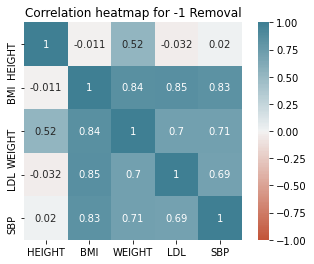

In [25]:
df_b_corr = df_b.corr()
ax = sns.heatmap(df_b_corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(20,220, n=200),
                 square=True,
                 annot=True)
ax.set_title("Correlation heatmap for mean replacement")